In [1]:
import os, sys
notebook_dir = os.getcwd()
sys.path.append(os.path.abspath(os.path.join(notebook_dir, "..")))
import pandas as pd

In [2]:
from scripts.correlation import align_datasets_by_date
from scripts.correlation import analyze_correlation_between_sentiment_and_returns
from scripts.correlation import perform_sentiment_analysis
from scripts.visualization import plot_correlation
from scripts.data_loading import load_historical_datasets
from scripts.data_loading import load_raw_analyst_ratings
from scripts.data_cleaning import merge_data
from scripts.data_loading import stock_data

In [3]:
# File paths
file_paths = [
    '../data/yfinance_data/AAPL_historical_data.csv',
    '../data/yfinance_data/AMZN_historical_data.csv',
    '../data/yfinance_data/GOOG_historical_data.csv',
    '../data/yfinance_data/META_historical_data.csv',
    '../data/yfinance_data/MSFT_historical_data.csv',
    '../data/yfinance_data/NVDA_historical_data.csv',
    '../data/yfinance_data/TSLA_historical_data.csv',
]
raw_ratings_path = '../data/raw_analyst_ratings.csv'

In [4]:
merged_stock = merge_data(file_paths)

In [5]:
stock_df = stock_data('../data/processed/merged_stock_data.csv')

In [6]:
news_df = load_raw_analyst_ratings(raw_ratings_path)

In [7]:
print(news_df.columns)
print(stock_df.columns)


Index(['Unnamed: 0', 'headline', 'url', 'publisher', 'date', 'stock'], dtype='object')
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Dividends', 'Stock Splits', 'Ticker'],
      dtype='object')


In [8]:
aligned_news, aligned_stock = align_datasets_by_date(
    news_df, 
    stock_df, 
)

In [9]:
news_df_sent = perform_sentiment_analysis(news_df)

In [10]:
merged_df = analyze_correlation_between_sentiment_and_returns(stock_df, news_df_sent)

In [12]:
print(merged_df.columns)
if 'Daily_Return' not in merged_df.columns:
    if 'daily_return' in merged_df.columns:
        merged_df.rename(columns={'daily_return': 'Daily_Return'}, inplace=True)
    elif 'Close' in merged_df.columns:
        merged_df['Daily_Return'] = merged_df['Close'].pct_change()
    else:
        print("No column available to compute Daily_Return. Please check your data.")


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Dividends', 'Stock Splits', 'Ticker', 'Avg_Sentiment_Score'],
      dtype='object')


In [14]:
print(merged_df.columns)
merged_df.head()


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Dividends', 'Stock Splits', 'Ticker', 'Avg_Sentiment_Score',
       'Daily_Return'],
      dtype='object')


,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,Ticker,Avg_Sentiment_Score,Daily_Return
0,2011-04-27,12.580000,12.583929,12.396429,12.505357,10.560461,356213200,0.0,0.0,AAPL,0.000000,NaN
1,2011-04-28,12.363929,12.491071,12.340000,12.383929,10.457921,360959200,0.0,0.0,AAPL,0.068182,-0.009710
2,2011-04-29,12.385000,12.641071,12.381071,12.504643,10.559862,1006345200,0.0,0.0,AAPL,0.166667,0.009748
3,2011-05-02,12.490714,12.516786,12.339286,12.367143,10.443746,442713600,0.0,0.0,AAPL,-0.009259,-0.010996
4,2011-05-03,12.428214,12.496071,12.343571,12.435714,10.501650,313348000,0.0,0.0,AAPL,0.000000,0.005545


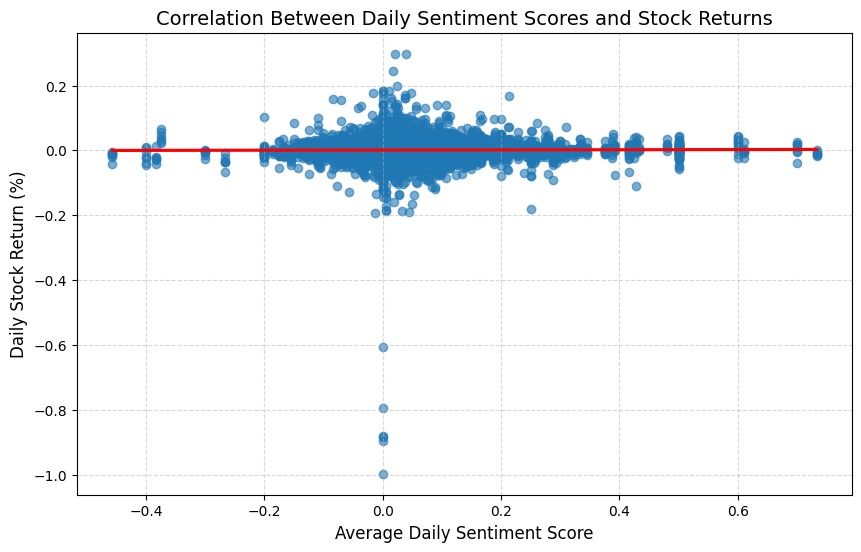

In [13]:
plot_correlation(merged_df)